In [1]:
import os
os.chdir("..")

I0000 00:00:1700234245.204215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


torch.Size([90, 720, 406, 3]) 90


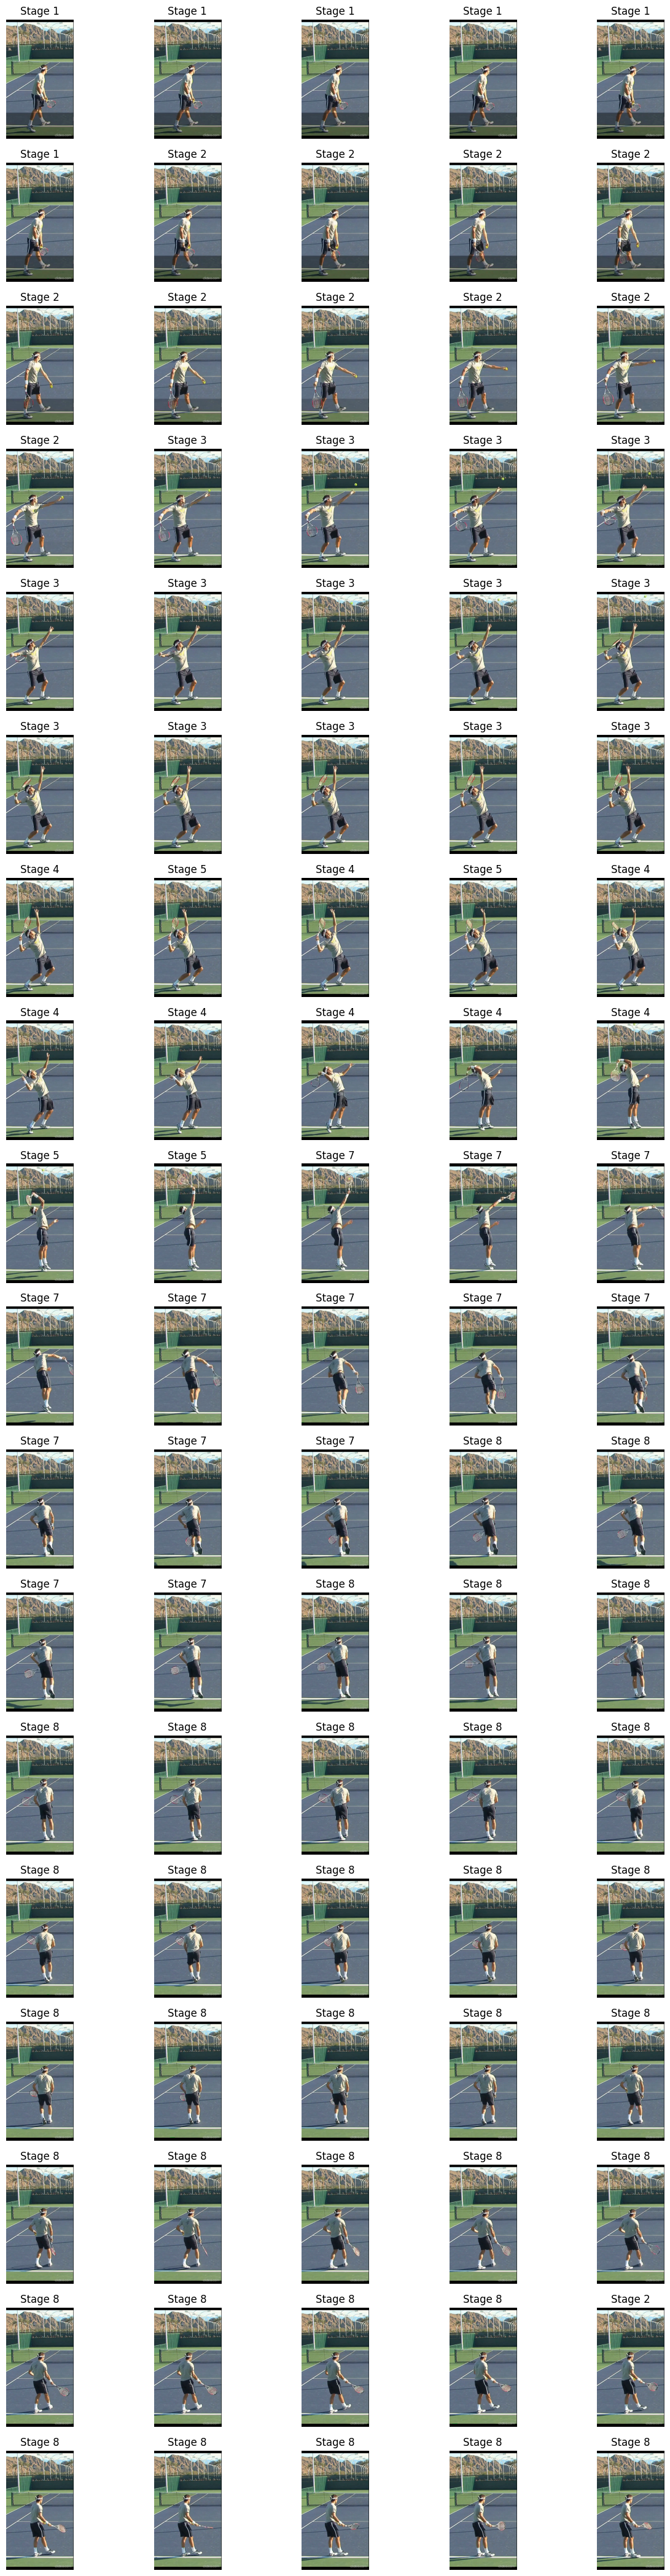

In [2]:
from model import VideoProcessor
from models.models import CN_S200_5_D0
import sys
import matplotlib.pyplot as plt
import torch

model = CN_S200_5_D0()
model.load()
vp = VideoProcessor()
frames, stages = vp.process("RData/RTennisServes/R0rf1.mp4")
print(frames.shape, len(stages))
ROWS = 20
COLS = len(frames) // ROWS + 1
plt.figure(figsize=(COLS * 3, ROWS * 3))
for i, (frame, stage) in enumerate(zip(frames, stages)):
    plt.subplot(ROWS, COLS, i + 1)
    plt.imshow(frame)
    plt.title(f"Stage {stage + 1}")
    plt.axis("off")

In [4]:
import cv2 
import numpy as np
c = -1
s = -1
video = None
for frame, stage in zip(frames, stages):
    if stage != s:
        c += 1
        print(stage, s)
        if video != None:
            print("releasing")
            video.release()
        s = stage
        video = cv2.VideoWriter(f"output/{c}_Stage{s + 1}.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 30, (frames.shape[2], frames.shape[1]))
    video.write(frame[:, :, [2, 1, 0]].numpy())
video.release()

0 -1
1 0
releasing
2 1
releasing
3 2
releasing
4 3
releasing
3 4
releasing
4 3
releasing
3 4
releasing
4 3
releasing
6 4
releasing
7 6
releasing
6 7
releasing
7 6
releasing
1 7
releasing
7 1
releasing
